# COGS 108 - Data Checkpoint

# Names

- Nathaniel Wong
- Ethan Tan
- Judy Liu
- Clara Pozuelos
- Aidan Twul

<a id='research_question'></a>
# Research Question

Was the performance of technology related sectors as represented by the performance of the QQQ as well as physical entertainment companies as represented by the Las Vegas Sands (LVS) corporation in the stock market directly influenced by the rise and fall of COVID-19 infection rates in the 2020 year?

# Dataset(s)

- Dataset Name: QQQ Historical Data
- Link to the dataset: https://finance.yahoo.com/quote/QQQ/history?period1=1568592000&period2=1644537600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
- Number of observations: 604

QQQ: This data is information about the open and close of the Invesco QQQ Trust Series 1 Fund which tracks majoor technology stocks. We will be using the information from this stock to track the general sentiment of technology companies in relation to corona virus infections. Note that QQQ does not necessarily stand for anything and is merely the stock ticker name.



- Dataset Name: LVS Historical Data
- Link to the dataset: https://finance.yahoo.com/quote/LVS/history?period1=1568592000&period2=1644537600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
- Number of observations: 609

LVS: This data is information about the open and close of Las Vegas Sands company, a major casino entertainment conglomerate. We will be using the information from this data to track the general sentiment about physical entertainment companies in relation to corona virus infections.


- Dataset Name: WHO Covid-19 Global Data
- Link to the dataset: https://data.humdata.org/dataset/coronavirus-covid-19-cases-and-deaths
- Number of observations: 182727

WHO: This data is information about the Coronavirus COVID-19 daily new and cumulative cases and deaths globally. We will be using the information from this data to track the number of cases of Covid-19 in the United States during the 2020 year.


Because we are tracking the relationship between covid-19 infections and the performance of stocks in technology and physical enteretainment sectors, we will ideally combining the data of covid infection rates along with the QQQ and LVS performance data over time to see if there is a general correlation between rising infection rates with rising technology stock performance, and a general correlation between rising infection rates with decreasing phsyical entertainment stock perforamcne.

# Setup

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import matplotlib.pyplot as plt

In [2]:
QQQ_df = pd.read_csv('./datasets/QQQ.csv')
LVS_df = pd.read_csv('./datasets/LVS.csv')
WHO_df = pd.read_csv('./datasets/WHO-COVID-19-global-data.csv')

In [3]:
QQQ_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-16,191.300003,192.080002,191.110001,191.679993,188.889801,20319000
1,2019-09-17,191.699997,192.600006,191.289993,192.600006,189.796417,20953400
2,2019-09-18,192.199997,192.600006,190.110001,192.520004,189.717560,29781300
3,2019-09-19,192.860001,194.039993,192.470001,192.839996,190.032898,26039400
4,2019-09-20,193.110001,193.309998,190.160004,190.800003,188.022614,29086100


In [4]:
LVS_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-16,59.049999,59.759998,58.919998,59.639999,57.074806,3266200
1,2019-09-17,58.070000,59.160000,57.230000,59.110001,57.307491,5347800
2,2019-09-18,58.900002,59.000000,57.700001,58.380001,56.599754,2629000
3,2019-09-19,58.599998,58.939999,57.349998,57.580002,55.824150,3807300
4,2019-09-20,57.650002,57.869999,56.270000,56.330002,54.612267,4804300


In [5]:
WHO_df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


# Data Cleaning

In regards to cleaning up the QQQ and LVS stock data, there was minimal steps we had to undertake 
because the data we collected from Yahoo Finance provided everything we needed in a concise manner 
without any extraneous data that had to be cleaned up.

In [6]:
QQQ_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
LVS_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In regards to cleaning up the WHO Covid-19 data, the data was already cleaned because they were provided by a service that directly affiliates with World Health Organization. Due to our need, we have filtered the dataset so we only look at cases from the US and cases that happened in 2020.

In [8]:
# Check for country by unique name
WHO_df['Country'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
182722       Zimbabwe
182723       Zimbabwe
182724       Zimbabwe
182725       Zimbabwe
182726       Zimbabwe
Name: Country, Length: 182727, dtype: object>

In [9]:
# Create a new Dataframe with just cases reagrding the US
us_covid_df = WHO_df[WHO_df['Country'] == 'United States of America']

# Checking to see if any information is missing in the Dataframe
us_covid_df.isna().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [10]:
# Change the 'Date_reported' column to actual datetime type data 
# The below is wrong, keep getting this error: A value is trying to be set on a 
# copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead
us_covid_df['Date_reported'] = pd.to_datetime(us_covid_df['Date_reported'])

# Rechecking that the column types are correct
us_covid_df.dtypes

<ipython-input-10-15fe48e2dab2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_covid_df['Date_reported'] = pd.to_datetime(us_covid_df['Date_reported'])


Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

In [11]:
# Checking the column names of the dataframe
us_covid_df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [12]:
# Selecting only the necessary columns needed to do our analysis
us_covid_df = us_covid_df[['Date_reported', 'Country', 'New_cases', 'Cumulative_cases', 
                          'New_deaths', 'Cumulative_deaths']]

# Reconfiguring dataframe to include dates only in the year 2020
us_covid_df.loc[us_covid_df['Date_reported'].dt.year == 2020]

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
174246,2020-01-03,United States of America,0,0,0,0
174247,2020-01-04,United States of America,0,0,0,0
174248,2020-01-05,United States of America,0,0,0,0
174249,2020-01-06,United States of America,0,0,0,0
174250,2020-01-07,United States of America,0,0,0,0
...,...,...,...,...,...,...
174605,2020-12-27,United States of America,158525,18894000,2226,343083
174606,2020-12-28,United States of America,149358,19043358,1650,344733
174607,2020-12-29,United States of America,152831,19196189,1890,346623
174608,2020-12-30,United States of America,178998,19375187,2226,348849


In [13]:
# extract a subset of us_covid_df with data from the year of 2020
us_covid_2020_df = us_covid_df.loc[us_covid_df['Date_reported'].dt.year == 2020]

In [14]:
# extract a subset of QQQ_df with data from the year of 2020
QQQ_df_2020 = QQQ_df[QQQ_df['Date'].str[:4] == '2020']
QQQ_df_2020

,Date,Open,High,Low,Close,Adj Close,Volume
75,2020-01-02,214.399994,216.160004,213.979996,216.160004,213.905792,30969400
76,2020-01-03,213.300003,215.470001,213.279999,214.179993,211.946411,27518900
77,2020-01-06,212.500000,215.589996,212.240005,215.559998,213.312042,21655300
78,2020-01-07,215.639999,216.139999,214.850006,215.529999,213.282349,22139300
79,2020-01-08,215.500000,218.139999,215.160004,217.149994,214.885468,26397300
...,...,...,...,...,...,...,...
323,2020-12-24,308.470001,310.019989,308.390015,309.559998,308.075806,16785000
324,2020-12-28,312.250000,313.170013,310.359985,312.679993,311.180847,22497700
325,2020-12-29,314.049988,314.690002,312.029999,312.959991,311.459503,25871900
326,2020-12-30,314.160004,314.489990,312.329987,312.970001,311.469482,18138100


In [15]:
# extract a subset of LVS_df with data from the year of 2020
LVS_df_2020 = LVS_df[LVS_df['Date'].str[:4] == '2020']
LVS_df_2020

,Date,Open,High,Low,Close,Adj Close,Volume
75,2020-01-02,69.879997,70.940002,69.790001,70.800003,69.415199,5299600
76,2020-01-03,69.620003,70.150002,69.389999,69.720001,68.356323,2822400
77,2020-01-06,69.180000,70.120003,69.040001,70.089996,68.719086,2922500
78,2020-01-07,69.550003,70.199997,69.500000,70.160004,68.787720,2262800
79,2020-01-08,70.000000,71.300003,69.889999,70.800003,69.415199,3455300
...,...,...,...,...,...,...,...
323,2020-12-24,57.220001,57.490002,56.709999,57.009998,57.009998,898100
324,2020-12-28,58.049999,59.049999,57.360001,58.980000,58.980000,3956400
325,2020-12-29,59.349998,59.630001,58.070000,58.110001,58.110001,3076800
326,2020-12-30,58.400002,59.389999,58.130001,58.740002,58.740002,2179400


# Data Analysis

<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

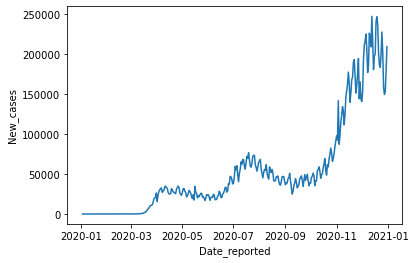

In [16]:
# line plot that observes new cases change with time (date reported)
sns.lineplot(x="Date_reported", y="New_cases", data=us_covid_2020_df)

From the lineplot above, we can observe that new cases comes in waves. There is a downward trend from April to June 2020, and another one from August to October 2020. There is an upward trend in late March and from June to August 2020. There is also an upward spike from October to end of the year.

<AxesSubplot:xlabel='Date_reported', ylabel='Cumulative_cases'>

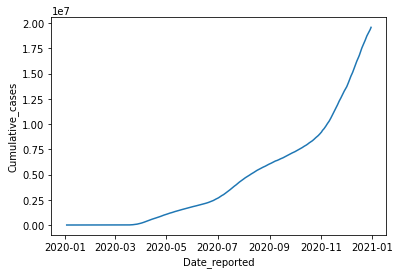

In [17]:
# line plot that observes cumulative cases with time (date reported)
sns.lineplot(x="Date_reported", y="Cumulative_cases", data=us_covid_2020_df)

From the lineplot above, we can see a steep increase in cumulative cases.

In [18]:
# add a new column that stores the day-to-day change in new cases
us_covid_2020_df["New_cases_change"] = us_covid_2020_df['New_cases'] - us_covid_2020_df['New_cases'].shift(-1)

<ipython-input-18-79ef63f9cef1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_covid_2020_df["New_cases_change"] = us_covid_2020_df['New_cases'] - us_covid_2020_df['New_cases'].shift(-1)


<AxesSubplot:xlabel='New_cases_change'>

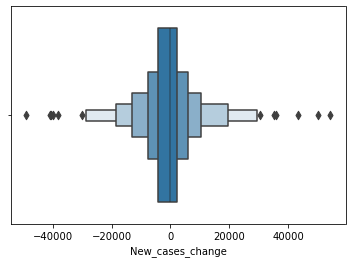

In [19]:
# an enhanced boxplot that observes the pattern for change in new cases
sns.boxenplot(x="New_cases_change", data=us_covid_2020_df)

<AxesSubplot:xlabel='New_cases_change'>

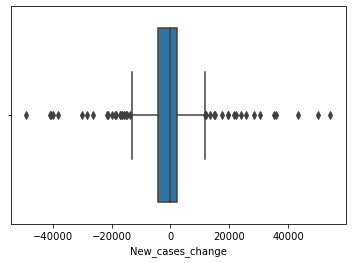

In [20]:
# boxplot for the change in new cases to observe outliers
sns.boxplot(x="New_cases_change", data=us_covid_2020_df)

In [21]:
# set our plot size
sns.set(rc= {'figure.figsize':(15,8)})

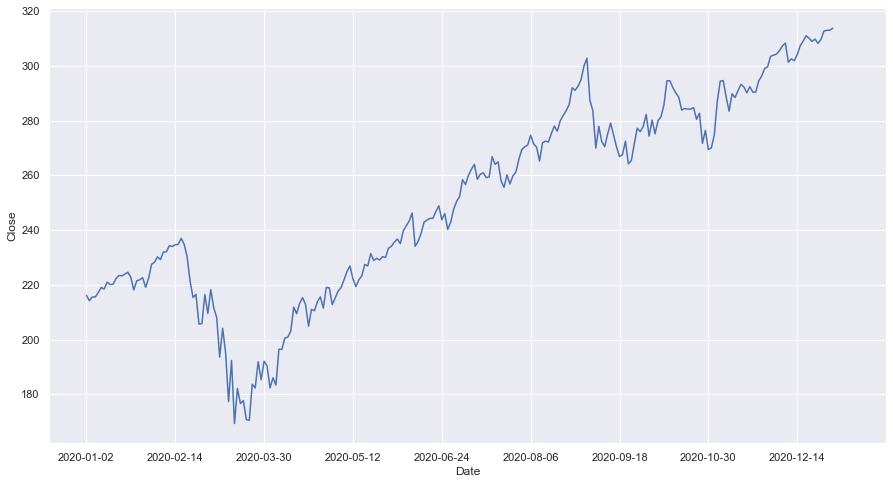

In [22]:
ax = sns.lineplot(x='Date', y='Close', data=QQQ_df_2020)
x_ticks = ax.set_xticks([i*30 for i in range(10)])

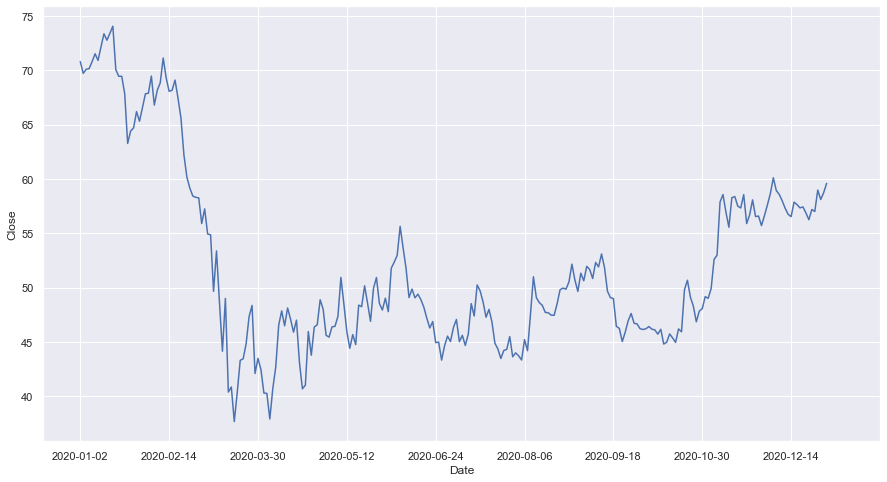

In [23]:
ax = sns.lineplot(x='Date', y='Close', data=LVS_df_2020)
x_ticks = ax.set_xticks([i*30 for i in range(10)])

## Combined Stock Data

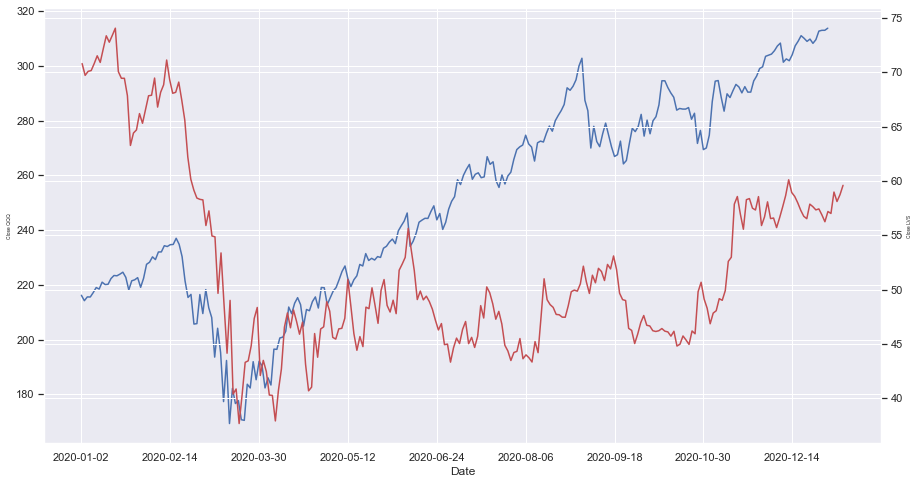

In [24]:
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=QQQ_df_2020)
plt.ylabel('Close QQQ', size=5)
ax2 = ax.twinx()
sns.lineplot(x='Date', y='Close', data=LVS_df_2020, color='r')
plt.ylabel('Close LVS', size=5)
plt.xlabel('Date', size=5)
x_ticks = ax.set_xticks([i*30 for i in range(10)])

As we can see in the initial data, with the onset of COVID, there is a harsh drop in stock price of both LVS and QQQ data. This is to be expected as with worldwide fears over the pandemic, there is no company which is left untouched as the public pulls their money out of companies.

After June of 2020 however, we see that there is a marked change in sentiment in which after the large initial drop, investors start pulling their money back into the market at a slow rate.
We see that technology has a remarkably stronger performance in that area in comparison to LVS, the Las Vegas Sands stock we are using as a marker for "travel" stocks.
We reason that this is because technology requires little social contact in order to be useful, whilst physical travel companies require individuals to be in actual locations which was restricted due to government lockdowns and quarantine states around the globe.


### Revised graph

In [25]:
# generate QQQ data in the form of date, change since previous day
QQQ_data = []
for i in range(1,len(QQQ_df_2020)):
    QQQ_data.append([QQQ_df_2020['Date'].iloc[i],QQQ_df_2020['Close'].iloc[i-1]-QQQ_df_2020['Close'].iloc[i]])
QQQ_data = pd.DataFrame(QQQ_data, columns = ['Date', 'Closing Change'])

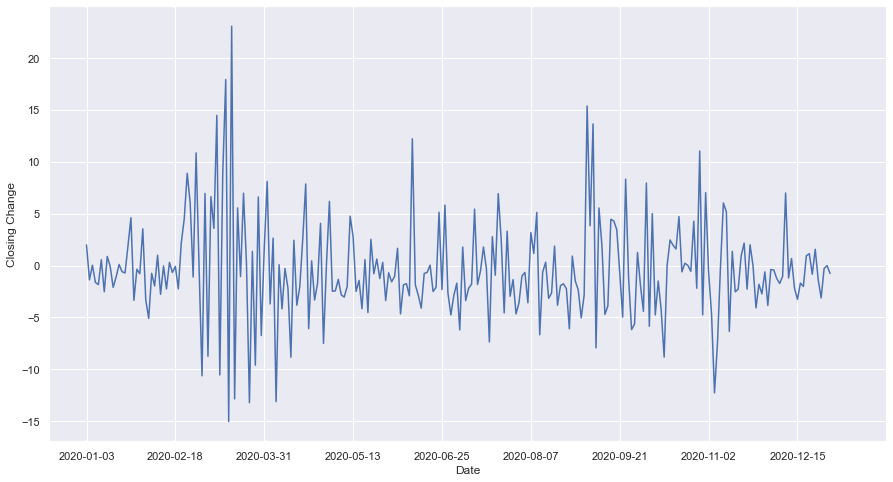

In [26]:
ax = sns.lineplot(x='Date', y='Closing Change', data=QQQ_data)
x_ticks = ax.set_xticks([i*30 for i in range(10)])

In [27]:
# generate data in the form of date, change since previous day
LVS_data = []
for i in range(1,len(LVS_df_2020)):
    LVS_data.append([LVS_df_2020['Date'].iloc[i],LVS_df_2020['Close'].iloc[i-1]-LVS_df_2020['Close'].iloc[i]])
LVS_data = pd.DataFrame(LVS_data, columns = ['Date', 'Closing Change'])

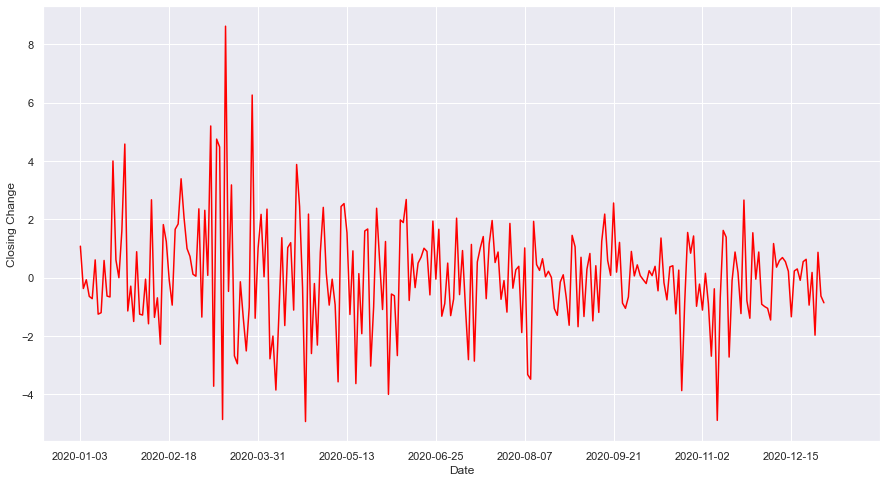

In [32]:
ax = sns.lineplot(x='Date', y='Closing Change', data=LVS_data, color='red')
x_ticks = ax.set_xticks([i*30 for i in range(10)])

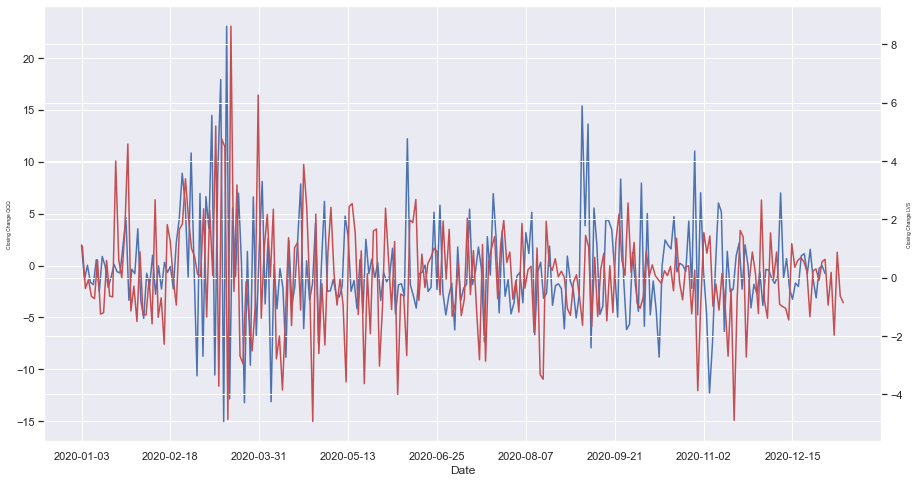

In [28]:
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Closing Change', data=QQQ_data)
plt.ylabel('Closing Change QQQ', size=5)
ax2 = ax.twinx()
sns.lineplot(x='Date', y='Closing Change', data=LVS_data, color='r')
plt.ylabel('Closing Change LVS', size=5)
plt.xlabel('Date', size=5)
x_ticks = ax.set_xticks([i*30 for i in range(10)])

When we look at the revised graphs which plot the slope at which the respective stocks increase, we see that there is a larger positive acceleration in which the price of the QQQ increases in comparison to that of LVS. This is in line with our analysis on how technology stock performance greatly outweighed that of LVS by demonstrating that the rate at which the stock price typically increased was much larger than that of the travel stock. Furthermore, we see that the value of this "slope" of closing prices, it is typically the case that the change in price value from the current day - the past day is positive, and much more than that of LVS stock relative performance. In other words, when we count the number of "positive change" days as well as the value of the "positive change", that of the QQQ results vastly outweighs LVS in terms of positive value as well as number of positive days.